# Problem set 1: Printing and plotting - comments/solution

### Programming for Economists Autumn 2025: Classes 5 & 9
**Matias BF Hall**

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [3]:
# Here we import packages we will use in the notebook
# We import numpy for numerical operations and matplotlib for plotting
# We import as specific names to make it easier to call functions from these packages e.g. np.array instead of numpy.array
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [4]:
def utility(x1,x2,alpha=0.5,beta=1):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

# x1 and x2 are positional arguments and must be called in the correct order
# alpha and beta are keyword arguments and can be called in any order, and have default values
# e.g. utility(1,2,beta=2) or utility(1,2,alpha=0.3) or utility(1,2,alpha=0.3,beta=2)

## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [5]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [6]:
def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    # formats the string to be 3 characters wide, and a string(3s) and adds it to text
    for j, x2 in enumerate(x2_vec):
    #enumerate iterates through x2_vec and gives both the index j and the value x2
       text += f'{j:6d}' 
         # formats the index j to be 6 characters wide, and an integer(6d) and adds it to text
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        if i > 0: text+='\n'
        # adds a line shift for each iteration except the first as we already did above
        text += f'{i:6d}'
        # the row header
        # formats the index i to be 6 characters wide, and an integer(6d) and adds it to text
        for j, x2 in enumerate(x2_vec):
            text += f'{u_func(x1,x2):6.3f}'
            # formats the utility value to be 6 characters wide, with 3 decimals (6.3f) and adds it to text
            
    
    # d. print
    return text

table = gen_table(x1_vec,x2_vec,utility)
# call the function with the utility function as an argument. Use the name of your function
print(table)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.711 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.711 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100


### Extra
Do you see a slightly more elegant solution with the newline above. HINT(You can remove the "if i>0" statement by removing other code). See solution below. If you want one more challenge you can think about how we can create both the header and body in the same loop using if statements

In [7]:
def gen_table(x1_vec,x2_vec,u_func):
    # a. empty text
    text = ''
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    # c. body
    for i, x1 in enumerate(x1_vec):
        text+='\n'
        # adding the line shift here instead of outside the loop lets us remove the if statement
        text += f'{i:6d}'
        for j, x2 in enumerate(x2_vec):
            text += f'{utility(x1,x2):6.3f}'
    # d. print
    return text

table = gen_table(x1_vec,x2_vec,utility)
print(table)

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.711 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.711 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100


## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [8]:
with open('table_output.txt', 'w') as f: # 'w' is for 'write'
    # as f is arbitrary, you can use any name you like, but 'f' for 'file' is common
    # the 'with' statement automatically closes the file when done
    f.write(gen_table(x1_vec,x2_vec,utility))
    # write the output of gen_table to the file

# If the filename doesn't already exist, a new file will be created. If it does exist, it will be overwritten.

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [9]:
with open('table_output.txt', 'r') as f: # 'r' is for 'read'
    print(f.read())
    # read the content of the file and print it

        0     1     2     3     4
     0 1.050 1.162 1.442 1.479 1.569
     1 1.162 1.300 1.661 1.711 1.832
     2 1.442 1.661 2.300 2.396 2.641
     3 1.479 1.711 2.396 2.500 2.768
     4 1.569 1.832 2.641 2.768 3.100


## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

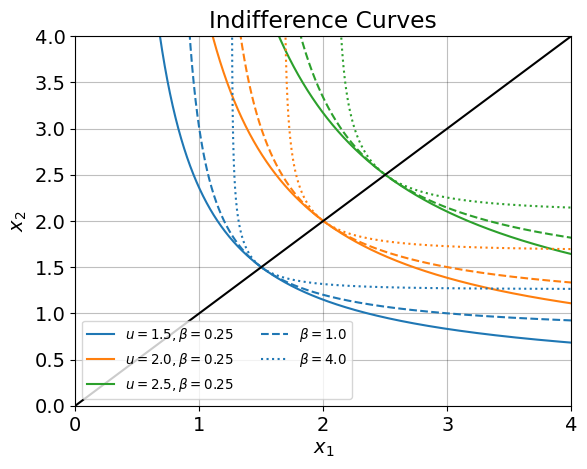

In [10]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# function to compute x2 given x1, u, alpha and beta
def x2_func(x1,u,alpha=0.5,beta=1):
    return ((u**(-beta)-alpha*x1**(-beta))/(1-alpha))**(-1/beta)


# Plotting

# Create figure and axis objects
fig = plt.figure()
# plt.figure is the figure object that contains all plot elements
ax = fig.add_subplot(1,1,1) # 1,1,1 is (nrows, ncols, index)
# add_subplot adds a subplot to the figure. Here we only have one subplot, but we could have more
# e.g. fig.add_subplot(2,2,1) would add a subplot in a 2x2 grid, in the first position

# Main loop to plot indifference curves
# We loop over the values of beta and uvals to plot the indifference curves
x1 = np.linspace(0.01,4.0,10000) # 10000 points from 0.01 to 4
for i,beta in enumerate(betas):
    for j,uval in enumerate(uvals):
        I = np.log(x1) > np.log(uval) + np.log(alpha)/beta
        # Create a boolean index array I where the condition is met
        # This ensures we only compute x2 where the expression inside the root is positive
        # This avoids complex numbers and NaNs in the plot
        # Try to print I to see what it looks like
        #print(I)
        
        x2 = x2_func(x1[I],uval,alpha,beta=beta)
        # we compute x2 for given values of x1, uval, alpha and beta
        # we use x1[I] to select only the values of x1 where the condition is met
        # it works because I is a boolean(true/false) array of the same length as x1 so every 
        # 'True' in I selects the corresponding value in x1 which are all the x1 values where the condition is met

        # Labeling - we set them so the graph is the same as Jeppe's
        if i == 0:
            label = f'$u={uval}, \\beta={beta}$'
        elif j == 0:
            label = f'$\\beta={beta}$'
        else:
            label = None
        
        ax.plot(x1[I],x2,label=label,color=colors[j],linestyle=['-','--',':'][i])
        # we plot the indifference curve with each iteration through uval and beta
        # label is used for the legend
        # color is chosen from the colors list set in the imports section in the top of the file, same utility has same colour
        # linestyle is chosen from a list of linestyles to match Jeppe's style, same beta has same linestyle


# Cosmetics

# 45 degree line
ax.plot([0,4],[0,4],color='black')
# we plot a line from (0,0) to (4,4) with color black
# can use zorder=0 to plot it first and bring it to the background

# Title and labels
ax.set_title('Indifference Curves')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Set axis limits and ticks
ax.set_xticks(np.arange(0,5,1))
# To replicate Jeppe's style, we set ticks at every integer from 0 to 4
ax.set_xlim(0.0,4.)
ax.set_ylim(0.0,4.)
# we set the x and y axis limits to be from 0 to 4

# Legend
ax.legend(ncols=2,prop={'size': 'x-small'})
# we add a legend with 2 columns and small font size

# Save figure
fig.savefig('2d_indifference_curves.png')
# Save the figure as a PNG file with the given filename in the current directory
# You can change the location by providing a path, e.g. 'figures/indifference_curves.png'


Mine and Jeppes Code has slight differences. It is a good exercise to look at the differences, and explain to yourself, why, despite these differences the graphs are almost indistinguishable. You can also consider how, Jeppe's solution is contained in a function. Functions are good when you need to repeat a task - Here we only need to plot once so function/no function is the same.

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [11]:
?np.meshgrid
# or
# help(np.meshgrid)
# I suggest also looking at ax.contour

Signature:       np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Call signature:  np.meshgrid(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function meshgrid at 0x0000025EEAE916C0>
File:            c:\users\admin\anaconda3\lib\site-packages\numpy\lib\_function_base_impl.py
Docstring:      
Return a tuple of coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced from ``(N1, ..., Ni, ... Nn)`` to
    ``(1, ..., 1, Ni, 1, ..., 1)``.  These sparse coordinate grids

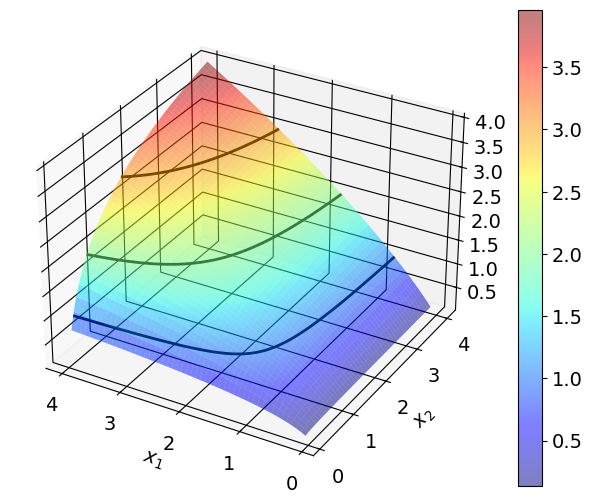

In [13]:
# these values were used
alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000)
x2_vec = np.linspace(0.1,4,1000)
uvals = [1.0,2.0,3.0]
# both x1_vec and x2_vec are numpy arrays with 1000 points from 0.1 to 4

# write your code here

x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec)
# creates a grid of x1 and x2 values for 3D plotting
# x1_grid and x2_grid are 2D arrays of shape (1000,1000) that is every combination of x1 and x2 values

u_grid = utility(x1_grid,x2_grid,alpha=alpha,beta=beta)
# compute utility for each combination of x1 and x2 in the grid

# Plotting

# Create figure and axis objects(in 3D) and plot surface
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
h = ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet, alpha=0.5) # cmap is the colormap, alpha sets transparency
# due to contour plot being below the surface, we set alpha to 0.5 to make the surface semi-transparent


# Indifference curves using contour plot
for uval in uvals:
    
    # create a mask to only plot where the condition is met
    I = np.log(x1_grid) > np.log(uval) + np.log(alpha)/beta
    u_grid_masked = np.where(I, u_grid, np.nan)
    
    # plot the contour
    ax.contour(x1_grid, x2_grid, u_grid_masked, levels=[uval], colors='black', linewidths=2)
    # we plot the contour where the utility is equal to uval
    # we use the masked grid to avoid plotting where the condition is not met

# Cosmetics

fig.colorbar(h) # adds a color bar to indicate the scale of utility values
ax.invert_xaxis() # invert x axis to match Jeppe's style
fig.tight_layout(pad=0.1) # adjusts the layout to fit everything in the figure area

# labels

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
#; prevents printing the last line output

Check Jeppe's solution in A6 and make sure you understand the differences from mine